# Table of Contents
1. [Introduction](#introduction)
2. [Import Libraries](#import-library)
3. [Config](#config-files)
4. [Data Loading](#data-loading)
5. [Data Cleaning](#data-cleaning)
6. [Data Analysis](#data-analysis)
7. [Conclusion](#conclusion)

## Introduction
<a id='introduction'></a>
Content for the Introduction section...

## Data Cleaning
<a id='data-cleaning'></a>
Content for the Data Cleaning section...

## Data Analysis
<a id='data-analysis'></a>
Content for the Data Analysis section...

## Import Libraries 
<a id='import-library'></a>

In [1]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Configuration Files 
<a id='config-files'></a>

In [3]:
data_path = 'data/ir-lymphoma-data' # Main path for the data files
tsv_file = data_path + '/ireceptor-public-archive.tsv' # TSV file containing the sequence of data
meta_data = data_path + '/ireceptor-public-archive-metadata.json' # Metadata in JSON format

## Data Loading
<a id='data-loading'></a>

In [16]:
# Load the TSV data into a pandas DataFrame
try:
    seqs_df = pd.read_csv(tsv_file, sep='\t')
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {tsv_file}")

# Load the metadata from a JSON file
try:
    with open(meta_data, 'r') as json_file:
        data = json.load(json_file)
    print("Metadata loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {data}")


Data loaded successfully.
Metadata loaded successfully.


In [9]:
# want the data within Repertoire
meta_df = pd.json_normalize(data['Repertoire'])
diag_df = meta_df[['repertoire_id', 'subject.diagnosis']].copy()
diag_df['subject.diagnosis'] = diag_df['subject.diagnosis'].apply(lambda x: ''.join([item["study_group_description"] for item in x]))
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 64 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   repertoire_id                                                    76 non-null     object
 1   repertoire_name                                                  0 non-null      object
 2   repertoire_description                                           0 non-null      object
 3   sample                                                           76 non-null     object
 4   data_processing                                                  76 non-null     object
 5   organism                                                         76 non-null     object
 6   ir_sra_run_id                                                    76 non-null     object
 7   ir_sequence_count                                      

In [11]:
diag_df.head()

,repertoire_id,subject.diagnosis
0,10,Case
1,16,Case
2,27,Case
3,38,Case
4,42,Control (Healthy)


In [12]:
meta_df.head()

,repertoire_id,repertoire_name,repertoire_description,sample,data_processing,organism,ir_sra_run_id,ir_sequence_count,ir_fasta_file_name,ir_germline_database,...,subject.race,subject.strain_name,subject.linked_subjects,subject.link_type,subject.diagnosis,subject.genotype.receptor_genotype_set.receptor_genotype_set_id,subject.genotype.receptor_genotype_set.genotype_class_list,subject.genotype.mhc_genotype_set.mhc_genotype_set_id,subject.genotype.mhc_genotype_set.mhc_genotype_class_list,subject.genotype.mhc_genotype_set.mhc_genotype_list
0,10,None,None,"[{'sample_processing_id': '354', 'sample_id': ...","[{'data_processing_id': '364', 'primary_annota...",Homo sapiens,ERS205713,6464,filtered_ERR220435.fasta,IMGT,...,None,None,None,None,"[{'study_group_description': 'Case', 'disease_...",None,"[{'receptor_genotype_id': None, 'locus': None,...",None,"[{'mhc_genotype_id': None, 'genotype_class': N...","[{'mhc_alleles': [{'allele_designation': None,..."
1,16,None,None,"[{'sample_processing_id': '318', 'sample_id': ...","[{'data_processing_id': '328', 'primary_annota...",Homo sapiens,ERS205713,6315,filtered_ERR220399.fasta,IMGT,...,None,None,None,None,"[{'study_group_description': 'Case', 'disease_...",None,"[{'receptor_genotype_id': None, 'locus': None,...",None,"[{'mhc_genotype_id': None, 'genotype_class': N...","[{'mhc_alleles': [{'allele_designation': None,..."
2,27,None,None,"[{'sample_processing_id': '325', 'sample_id': ...","[{'data_processing_id': '335', 'primary_annota...",Homo sapiens,ERS205713,8243,filtered_ERR220406.fasta,IMGT,...,None,None,None,None,"[{'study_group_description': 'Case', 'disease_...",None,"[{'receptor_genotype_id': None, 'locus': None,...",None,"[{'mhc_genotype_id': None, 'genotype_class': N...","[{'mhc_alleles': [{'allele_designation': None,..."
3,38,None,None,"[{'sample_processing_id': '329', 'sample_id': ...","[{'data_processing_id': '339', 'primary_annota...",Homo sapiens,ERS205713,5457,filtered_ERR220410.fasta,IMGT,...,None,None,None,None,"[{'study_group_description': 'Case', 'disease_...",None,"[{'receptor_genotype_id': None, 'locus': None,...",None,"[{'mhc_genotype_id': None, 'genotype_class': N...","[{'mhc_alleles': [{'allele_designation': None,..."
4,42,None,None,"[{'sample_processing_id': '390', 'sample_id': ...","[{'data_processing_id': '400', 'primary_annota...",Homo sapiens,ERS205713,7622,filtered_ERR220464.fasta,IMGT,...,None,None,None,None,[{'study_group_description': 'Control (Healthy...,None,"[{'receptor_genotype_id': None, 'locus': None,...",None,"[{'mhc_genotype_id': None, 'genotype_class': N...","[{'mhc_alleles': [{'allele_designation': None,..."


In [13]:
diag_df

,repertoire_id,subject.diagnosis
0,10,Case
1,16,Case
2,27,Case
3,38,Case
4,42,Control (Healthy)
...,...,...
71,507,Control (Healthy)
72,508,Control (Healthy)
73,519,Case
74,525,Control (Healthy)


### seq data prepration

In [19]:
seqs_df.dropna(how= "all", axis=1, inplace=True)

In [20]:
seqs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063925 entries, 0 to 1063924
Data columns (total 35 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   sequence            1063925 non-null  object 
 1   rev_comp            1063925 non-null  object 
 2   productive          1063925 non-null  object 
 3   locus               1021327 non-null  object 
 4   v_call              1021327 non-null  object 
 5   d_call              702905 non-null   object 
 6   j_call              767885 non-null   object 
 7   junction            708540 non-null   object 
 8   junction_aa         708540 non-null   object 
 9   v_score             1021327 non-null  float64
 10  j_score             767885 non-null   float64
 11  cdr1_start          808592 non-null   float64
 12  cdr1_end            808592 non-null   float64
 13  cdr2_start          936620 non-null   float64
 14  cdr2_end            936620 non-null   float64
 15  cdr3_start     

In [16]:
# merge rep_id_diagnosis with seq_data
#r, c = seqs_df.shape
#print(r,c, "\n", seq_data_df['repertoire_id'])

diag_df['repertoire_id'] = diag_df['repertoire_id'].astype(int) #cast needed for lymphoma data

seqs_diag = pd.merge(diag_df, seqs_df, on='repertoire_id', how='left')
# Rename the 'subject.diagnosis' column to 'diagnosis'
seqs_diag.rename(columns={'subject.diagnosis': 'diagnosis', 'subject.sex': 'sex', 'subject.age':'age', }, inplace=True)
 
grouped_data = seqs_diag.groupby(['repertoire_id', 'diagnosis']).size().reset_index(name='count')
print(grouped_data)

    repertoire_id          diagnosis  count
0              10               Case   6464
1              16               Case   6315
2              27               Case   8243
3              38               Case   5457
4              42  Control (Healthy)   7622
..            ...                ...    ...
71            507  Control (Healthy)   6585
72            508  Control (Healthy)   7684
73            519               Case  33536
74            525  Control (Healthy)   7850
75            526               Case  25403

[76 rows x 3 columns]


In [17]:
seqs_diag

,repertoire_id,diagnosis,sequence,rev_comp,productive,locus,v_call,d_call,j_call,junction,...,fwr4_end,junction_length,junction_aa_length,sequence_id,v_subgroup,v_gene,j_subgroup,j_gene,d_subgroup,d_gene
0,10,Case,ATTGTCCCTTGGGGCCCAGATATCAGAAGCATCATCCAAGAAGTAA...,T,F,IGH,"IGHV3-15*01, or IGHV3-15*02",IGHD3-16*01,IGHJ3*02,tgtaccagagtggggaacctagatgacgatttacttcttggatgat...,...,303.0,61,20,5a627ad5b4737f116d8c4271,IGHV3,IGHV3-15,IGHJ3,IGHJ3,IGHD3,IGHD3-16
1,10,Case,ATTGTCCCTTGGGCCCAGATATCAGAAGCATCATCCAAGAAGTAAA...,T,F,IGH,"IGHV3-15*01, or IGHV3-15*02",IGHD3-16*01,IGHJ3*02,tgtaccagagtggggaacctagatgacgatttacttcttggatgat...,...,299.0,61,20,5a627ad5b4737f116d8c4272,IGHV3,IGHV3-15,IGHJ3,IGHJ3,IGHD3,IGHD3-16
2,10,Case,ATTGTCCCTTGGGCCCAGATATCAGAAGCATCATCCAAGAAGTAAA...,T,F,IGH,"IGHV3-15*01, or IGHV3-15*02",IGHD3-16*01,IGHJ3*02,tgtaccagagtggggaacctagatgacgatttacttcttggatgat...,...,301.0,61,20,5a627ad5b4737f116d8c4273,IGHV3,IGHV3-15,IGHJ3,IGHJ3,IGHD3,IGHD3-16
3,10,Case,TGCAGCCTCTGGATTCTTTTTCAGTGGCGCCTGGATGAGCTGGGTC...,F,F,IGH,"IGHV3-15*01, or IGHV3-15*02",NaN,NaN,NaN,...,NaN,0,0,5a627ad5b4737f116d8c4274,IGHV3,IGHV3-15,NaN,NaN,NaN,NaN
4,10,Case,ATTGTCCCTTGGGCCCAGATATCAGAAGCATCATCCAAGAAGTAAA...,T,F,IGH,"IGHV3-15*01, or IGHV3-15*02",IGHD3-16*01,IGHJ3*02,tgtaccagagtggggaacctagatgacgatttacttcttggatgat...,...,302.0,61,20,5a627ad5b4737f116d8c4275,IGHV3,IGHV3-15,IGHJ3,IGHJ3,IGHD3,IGHD3-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063920,526,Case,AAGGGTTCTGGATACAGCTTTACCAGCTACTGGATCGGCTGGGTGC...,F,F,IGH,"IGHV5-51*01, or IGHV5-51*03",NaN,NaN,NaN,...,NaN,0,0,5a627a06b4737f116d8c2ec2,IGHV5,IGHV5-51,NaN,NaN,NaN,NaN
1063921,526,Case,GTGGTCCCTTGGCCCCAGACGTCCATACCGTAGTAGTAGTAGTCTT...,T,T,IGH,"IGHV5-51*01, or IGHV5-51*03",IGHD6-19*01,IGHJ6*02,tgtgcgagacgtatcccatctatagcagtggctggtaattggatgg...,...,300.0,78,26,5a627a06b4737f116d8c2ec3,IGHV5,IGHV5-51,IGHJ6,IGHJ6,IGHD6,IGHD6-19
1063922,526,Case,GTGGTCCCTTGGCCCCAGACGTCCATACCGTAGTAGTAGTAGTCTT...,T,T,IGH,"IGHV5-51*01, or IGHV5-51*03",IGHD6-19*01,IGHJ6*02,tgtgcgagacgtatcccatctatagcagtggctggtaattggatgg...,...,308.0,78,26,5a627a06b4737f116d8c2ec4,IGHV5,IGHV5-51,IGHJ6,IGHJ6,IGHD6,IGHD6-19
1063923,526,Case,AAGGGTTCTGGATACAGCTTTACCAGCTACTGGATCGGCTGGGTGC...,F,T,IGH,"IGHV5-51*01, or IGHV5-51*03",IGHD6-19*01,IGHJ6*02,tgtgcgagacgtatcccatctatagcagtggctggtaattggatgg...,...,311.0,78,26,5a627a06b4737f116d8c2ec5,IGHV5,IGHV5-51,IGHJ6,IGHJ6,IGHD6,IGHD6-19


In [5]:
list(seqs_diag)

['repertoire_id',
 'diagnosis',
 'sequence',
 'rev_comp',
 'productive',
 'locus',
 'v_call',
 'd_call',
 'j_call',
 'junction',
 'junction_aa',
 'v_score',
 'j_score',
 'cdr1_start',
 'cdr1_end',
 'cdr2_start',
 'cdr2_end',
 'cdr3_start',
 'cdr3_end',
 'fwr1_start',
 'fwr1_end',
 'fwr2_start',
 'fwr2_end',
 'fwr3_start',
 'fwr3_end',
 'fwr4_start',
 'fwr4_end',
 'junction_length',
 'junction_aa_length',
 'sequence_id',
 'v_subgroup',
 'v_gene',
 'j_subgroup',
 'j_gene',
 'd_subgroup',
 'd_gene']

In [6]:
# Step 0: Group the data by 'repertoire_id' and 'v_subgroup' and calculate the count
grouped_data = seqs_diag.groupby(['repertoire_id', 'diagnosis', 'v_subgroup']).size().reset_index(name='count')

# Step 2: Calculate the total count for each 'repertoire_id'
total_counts = grouped_data.groupby('repertoire_id')['count'].sum()

# Step 3: Merge the total_counts back into the grouped_data DataFrame
grouped_data = grouped_data.merge(total_counts, on='repertoire_id', suffixes=('', '_total'))

# Step 4: Calculate the relative frequency by dividing count by the total count for each group
grouped_data['relative_frequency'] = grouped_data['count'] / grouped_data['count_total']

# Step 5: Drop the 'count_total' column (if needed) since it's no longer needed in the final result
grouped_data.drop(columns=['count_total'], inplace=True)

# Step 6: Print the resulting DataFrame
print(grouped_data)

     repertoire_id diagnosis       v_subgroup  count  relative_frequency
0               10      Case            IGHV1     79            0.012445
1               10      Case            IGHV2      9            0.001418
2               10      Case            IGHV3   6128            0.965343
3               10      Case            IGHV4    124            0.019534
4               10      Case            IGHV5      6            0.000945
..             ...       ...              ...    ...                 ...
564            526      Case            IGHV4    938            0.038443
565            526      Case            IGHV5  19936            0.817049
566            526      Case            IGHV6      8            0.000328
567            526      Case            IGHV7     65            0.002664
568            526      Case  IGHV7, or IGHV5      1            0.000041

[569 rows x 5 columns]


In [7]:
# Step 0: Group the data by 'repertoire_id' and 'v_subgroup' and calculate the count
grouped_data = seqs_diag.groupby(['repertoire_id', 'diagnosis', 'v_subgroup']).size().reset_index(name='count')

# Step 1: Calculate the total count for each 'repertoire_id'
total_counts = grouped_data.groupby('repertoire_id')['count'].sum()

# Step 2: Merge the total_counts back into the grouped_data DataFrame
grouped_data = grouped_data.merge(total_counts, on='repertoire_id', suffixes=('', '_total'))

# Step 3: Calculate the relative frequency by dividing count by the total count for each group
grouped_data['relative_frequency'] = grouped_data['count'] / grouped_data['count_total']

# Step 4: Find the maximum relative frequency for each 'repertoire_id'
max_relative_freq_per_repertoire = grouped_data.groupby('repertoire_id')['relative_frequency'].max()

# Step 5: Create a DataFrame to store the result with 'repertoire_id', 
#'v_subgroup', and 'max_relative_frequency'
result_df = grouped_data.loc[grouped_data.groupby('repertoire_id')
            ['relative_frequency'].idxmax()].reset_index(drop=True)

# Step 6: Merge the 'max_relative_frequency' column from 'max_relative_freq_per_repertoire' into 'result_df'
result_df['max_relative_frequency'] = max_relative_freq_per_repertoire.values

# Step 7: Print the result DataFrame
pd.set_option('display.max_columns', None)  # or 1000, None for all
pd.set_option('display.max_rows', 50)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
selected_columns = ['repertoire_id', 'diagnosis', 'v_subgroup', 'max_relative_frequency']
print(result_df[selected_columns])
pd.reset_option('display.max_rows')

    repertoire_id          diagnosis v_subgroup  max_relative_frequency
0              10               Case      IGHV3                0.965343
1              16               Case      IGHV3                0.997780
2              27               Case      IGHV3                0.970986
3              38               Case      IGHV1                0.997950
4              42  Control (Healthy)      IGHV4                0.356045
..            ...                ...        ...                     ...
71            507  Control (Healthy)      IGHV4                0.360519
72            508  Control (Healthy)      IGHV4                0.355771
73            519               Case      IGHV4                0.976883
74            525  Control (Healthy)      IGHV4                0.336834
75            526               Case      IGHV5                0.817049

[76 rows x 4 columns]


In [8]:
# Print the column names of the DataFrame 'result_df'
print(result_df.columns)
print(result_df)

Index(['repertoire_id', 'diagnosis', 'v_subgroup', 'count', 'count_total',
       'relative_frequency', 'max_relative_frequency'],
      dtype='object')
    repertoire_id          diagnosis v_subgroup  count  count_total  \
0              10               Case      IGHV3   6128         6348   
1              16               Case      IGHV3   6293         6307   
2              27               Case      IGHV3   7898         8134   
3              38               Case      IGHV1   5355         5366   
4              42  Control (Healthy)      IGHV4   2618         7353   
..            ...                ...        ...    ...          ...   
71            507  Control (Healthy)      IGHV4   2250         6241   
72            508  Control (Healthy)      IGHV4   2685         7547   
73            519               Case      IGHV4  32327        33092   
74            525  Control (Healthy)      IGHV4   2566         7618   
75            526               Case      IGHV5  19936        2440

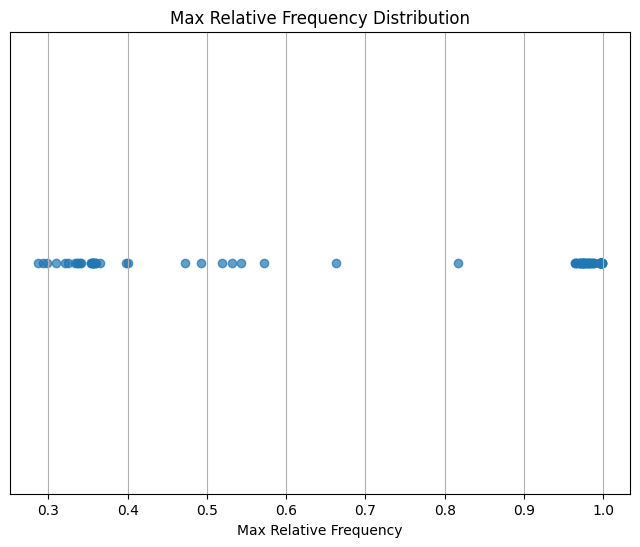

In [9]:


# Assuming you have the 'result_df' DataFrame from the previous code snippet.

# Plot the data directly using 'max_relative_frequency'
plt.figure(figsize=(8, 6))
plt.scatter(result_df['max_relative_frequency'], [0] * len(result_df), alpha=0.7)
plt.xlabel('Max Relative Frequency')
plt.yticks([])
plt.title('Max Relative Frequency Distribution')
plt.grid(True)
plt.show()

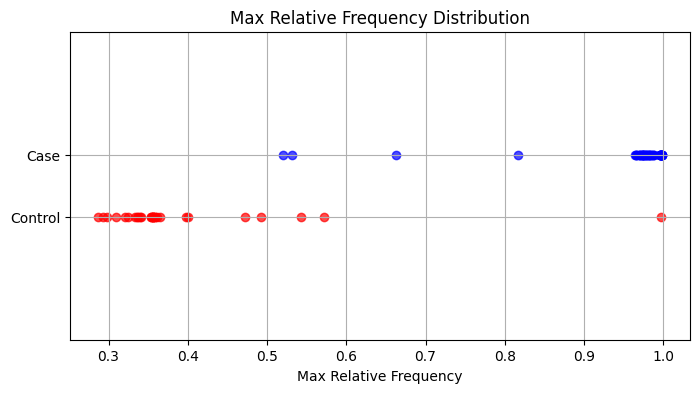

diagnosis
Case                 47
Control (Healthy)    29
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(8, 4))

plt.scatter(result_df[result_df['diagnosis']
            == 'Case']['max_relative_frequency'], 
            [.6] * result_df['diagnosis'].eq('Case').sum(), 
            color='blue', alpha=0.7, label='Case')
plt.scatter(result_df[result_df['diagnosis'] 
            == 'Control (Healthy)']['max_relative_frequency'], 
            [.4] * result_df['diagnosis'].eq('Control (Healthy)').sum(), 
            color='red', alpha=0.7, label='Control')

plt.xlabel('Max Relative Frequency')

plt.title('Max Relative Frequency Distribution')
#plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.yticks([.4, .6], ['Control', 'Case'])
plt.show()
print(result_df['diagnosis'].value_counts())

In [11]:
print(result_df['max_relative_frequency'].min())
print(result_df['max_relative_frequency'].max())

0.28704692329305986
0.9983179142136249


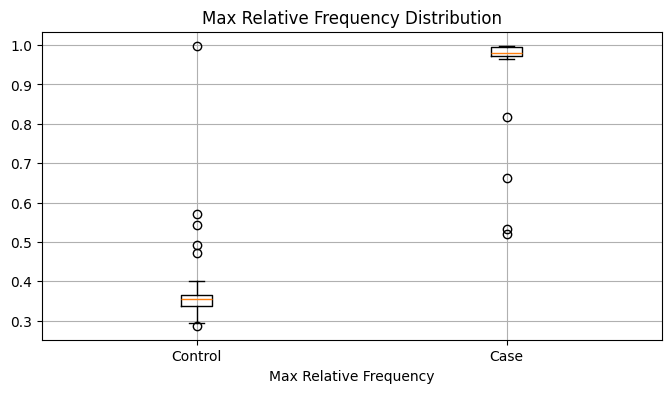

diagnosis
Case                 47
Control (Healthy)    29
Name: count, dtype: int64


In [12]:
plt.figure(figsize=(8, 4))

# Scatter plots

# Box plot
plt.boxplot([result_df[result_df['diagnosis'] == 'Control (Healthy)']['max_relative_frequency'],
             result_df[result_df['diagnosis'] == 'Case']['max_relative_frequency']], 
             labels=['Control', 'Case'], widths=0.1)

plt.xlabel('Max Relative Frequency')
plt.title('Max Relative Frequency Distribution')

plt.grid(True)
#plt.ylim(0, 1)

plt.show()

print(result_df['diagnosis'].value_counts())

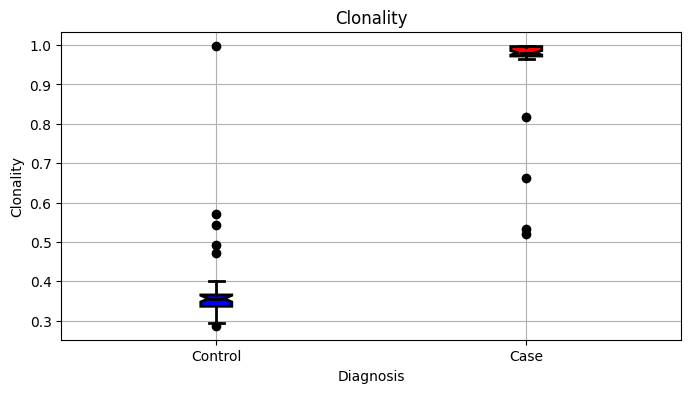

diagnosis
Case                 47
Control (Healthy)    29
Name: count, dtype: int64


In [13]:
#box plot
import matplotlib.pyplot as plt

# Assuming you have the 'result_df' DataFrame from the previous code snippet.

plt.figure(figsize=(8, 4))

# Box plot
boxprops = dict(linewidth=2, color='black')
medianprops = dict(linewidth=2, color='black')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markersize=6, markerfacecolor='black', markeredgecolor='black')

box_plot = plt.boxplot([result_df[result_df['diagnosis'] == 'Control (Healthy)']['max_relative_frequency'],
                        result_df[result_df['diagnosis'] == 'Case']['max_relative_frequency']],
                        labels=['Control', 'Case'], widths=0.1,
                        boxprops=boxprops, medianprops=medianprops, capprops=capprops, 
                        whiskerprops=whiskerprops, flierprops=flierprops,
                        patch_artist=True, showfliers=True, notch=True)

# Set the colors for the boxes
box_colors = ['blue', 'red']
for patch, color in zip(box_plot['boxes'], box_colors):
    patch.set_facecolor(color)

plt.xlabel('Diagnosis')
plt.ylabel('Clonality')
plt.title('Clonality')

plt.grid(True)
#plt.ylim(0, 1)

plt.show()

print(result_df['diagnosis'].value_counts())

/tmp/ipykernel_2920/3166950346.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y='max_relative_frequency',


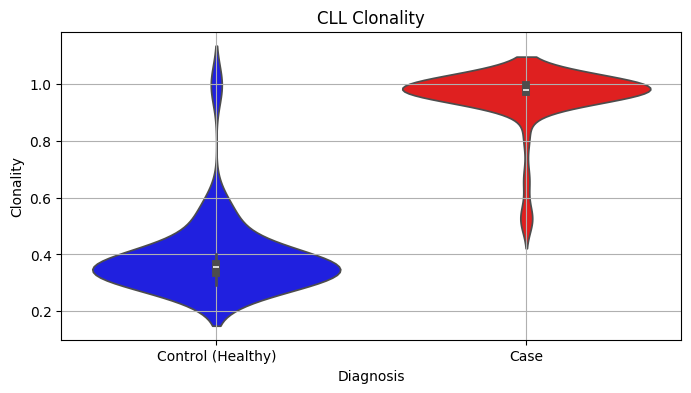

diagnosis
Case                 47
Control (Healthy)    29
Name: count, dtype: int64


In [14]:
import seaborn as sns

# Assuming you have the 'result_df' DataFrame from the previous code snippet.

plt.figure(figsize=(8, 4))

# Violin plot
sns.violinplot(x='diagnosis', y='max_relative_frequency', 
               data=result_df, order=['Control (Healthy)', 
                                      'Case'], palette=['blue', 'red'])

plt.xlabel('Diagnosis')
plt.ylabel('Clonality')
plt.title('CLL Clonality')

plt.grid(True)
plt.show()

print(result_df['diagnosis'].value_counts())

In [21]:
result_df

,repertoire_id,diagnosis,v_subgroup,count,count_total,relative_frequency,max_relative_frequency
0,10,Case,IGHV3,6128,6348,0.965343,0.965343
1,16,Case,IGHV3,6293,6307,0.997780,0.997780
2,27,Case,IGHV3,7898,8134,0.970986,0.970986
3,38,Case,IGHV1,5355,5366,0.997950,0.997950
4,42,Control (Healthy),IGHV4,2618,7353,0.356045,0.356045
...,...,...,...,...,...,...,...
71,507,Control (Healthy),IGHV4,2250,6241,0.360519,0.360519
72,508,Control (Healthy),IGHV4,2685,7547,0.355771,0.355771
73,519,Case,IGHV4,32327,33092,0.976883,0.976883
74,525,Control (Healthy),IGHV4,2566,7618,0.336834,0.336834


In [23]:
# Assuming 'group' column exists in 'result_df' and contains 'case' or 'control' labels
result_df_encoded = pd.get_dummies(result_df, columns=['diagnosis'], drop_first=True)
result_df_encoded

,repertoire_id,v_subgroup,count,count_total,relative_frequency,max_relative_frequency,diagnosis_Control (Healthy)
0,10,IGHV3,6128,6348,0.965343,0.965343,False
1,16,IGHV3,6293,6307,0.997780,0.997780,False
2,27,IGHV3,7898,8134,0.970986,0.970986,False
3,38,IGHV1,5355,5366,0.997950,0.997950,False
4,42,IGHV4,2618,7353,0.356045,0.356045,True
...,...,...,...,...,...,...,...
71,507,IGHV4,2250,6241,0.360519,0.360519,True
72,508,IGHV4,2685,7547,0.355771,0.355771,True
73,519,IGHV4,32327,33092,0.976883,0.976883,False
74,525,IGHV4,2566,7618,0.336834,0.336834,True


In [25]:

# # Separate the features ('max_relative_frequency', and 'group_case') for PCA
features = result_df_encoded[['max_relative_frequency', 'diagnosis_Control (Healthy)']]
features

,max_relative_frequency,diagnosis_Control (Healthy)
0,0.965343,False
1,0.997780,False
2,0.970986,False
3,0.997950,False
4,0.356045,True
...,...,...
71,0.360519,True
72,0.355771,True
73,0.976883,False
74,0.336834,True


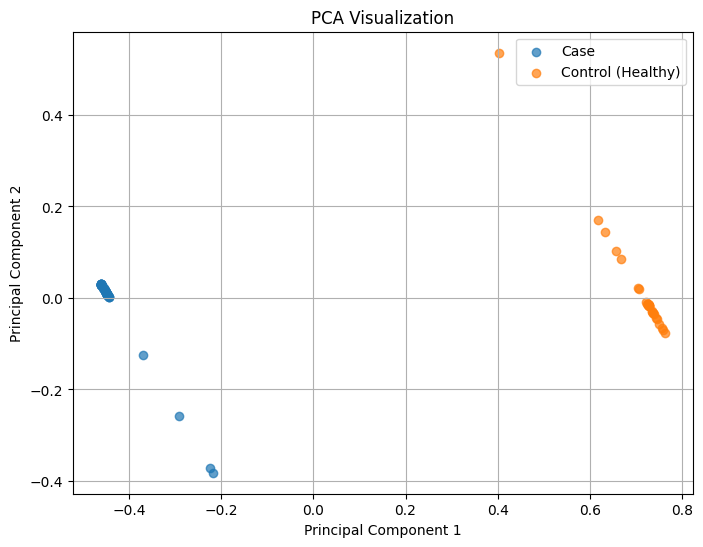

In [29]:

# Assuming you have the 'result_df' DataFrame from the previous code snippet.

# Assuming 'group' column exists in 'result_df' and contains 'case' or 'control' labels
result_df_encoded = pd.get_dummies(result_df, columns=['diagnosis'], drop_first=True)

# Separate the features ('max_relative_frequency', and 'group_case') for PCA
features = result_df_encoded[['max_relative_frequency', 'diagnosis_Control (Healthy)']]

# Perform PCA with the desired number of components (let's say 2 components for visualization)
num_components = 2
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(features)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i + 1}' for i in range(num_components)])

# Add the 'repertoire_id', 'diagnosis', and 'v_subgroup' columns back to the PCA DataFrame
pca_df[['repertoire_id', 'diagnosis_Control (Healthy)', 'v_subgroup']] = result_df_encoded[['repertoire_id', 'diagnosis_Control (Healthy)', 'v_subgroup']]

# Plot the PCA results
plt.figure(figsize=(8, 6))
# Assuming 'Case' is represented by False in the 'diagnosis_Control (Healthy)' column
plt.scatter(pca_df[pca_df['diagnosis_Control (Healthy)'] == False]['PC1'], pca_df[pca_df['diagnosis_Control (Healthy)'] == False]['PC2'], label='Case', alpha=0.7)
# Assuming 'Control (Healthy)' is represented by True in the 'diagnosis_Control (Healthy)' column
plt.scatter(pca_df[pca_df['diagnosis_Control (Healthy)'] == True]['PC1'], pca_df[pca_df['diagnosis_Control (Healthy)'] == True]['PC2'], label='Control (Healthy)', alpha=0.7)

# plt.scatter(pca_df[pca_df['group_case_case'] == 1]['PC1'], pca_df[pca_df['group_case_case'] == 1]['PC2'], label='Case', alpha=0.7)
# plt.scatter(pca_df[pca_df['group_case_control'] == 0]['PC1'], pca_df[pca_df['group_case_control'] == 0]['PC2'], label='Control', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.legend()
plt.grid(True)
plt.show()